## This report shows how many children in different countries are suffering. We can see that in some countries, things are getting better, but in others, they are still very bad

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
!pip install quarto-cli

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00
  Created wheel for quarto-cli: filename=quarto_cli-1.6.42-py3-none-any.whl size=129963243 sha256=edee81dc3b18a14b3453f431f6e0aa35e1bdaadd9fd6413ee19fcca20bfbcf44
  Stored in directory: /root/.cache/pip/wheels/08/53/61/bfcee646357ada471f314e1733d7306818bdd55d48ef8f830f
Successfully built quarto-cli
  Attempting 

In [3]:
import pandas as pd
import plotnine as p9
from plotnine import *
import numpy as np

In [4]:
indicator_1 = pd.read_csv("unicef_indicator_1.csv")
metadata = pd.read_csv("unicef_metadata.csv")

In [5]:
indicator_1 = indicator_1[indicator_1['sex'] == 'Total']
indicator_1 = indicator_1.rename(columns={'country': 'Country', 'time_period': 'Year', 'obs_value': 'Value'})
indicator_1 = indicator_1[['Country', 'Year', 'Value']]

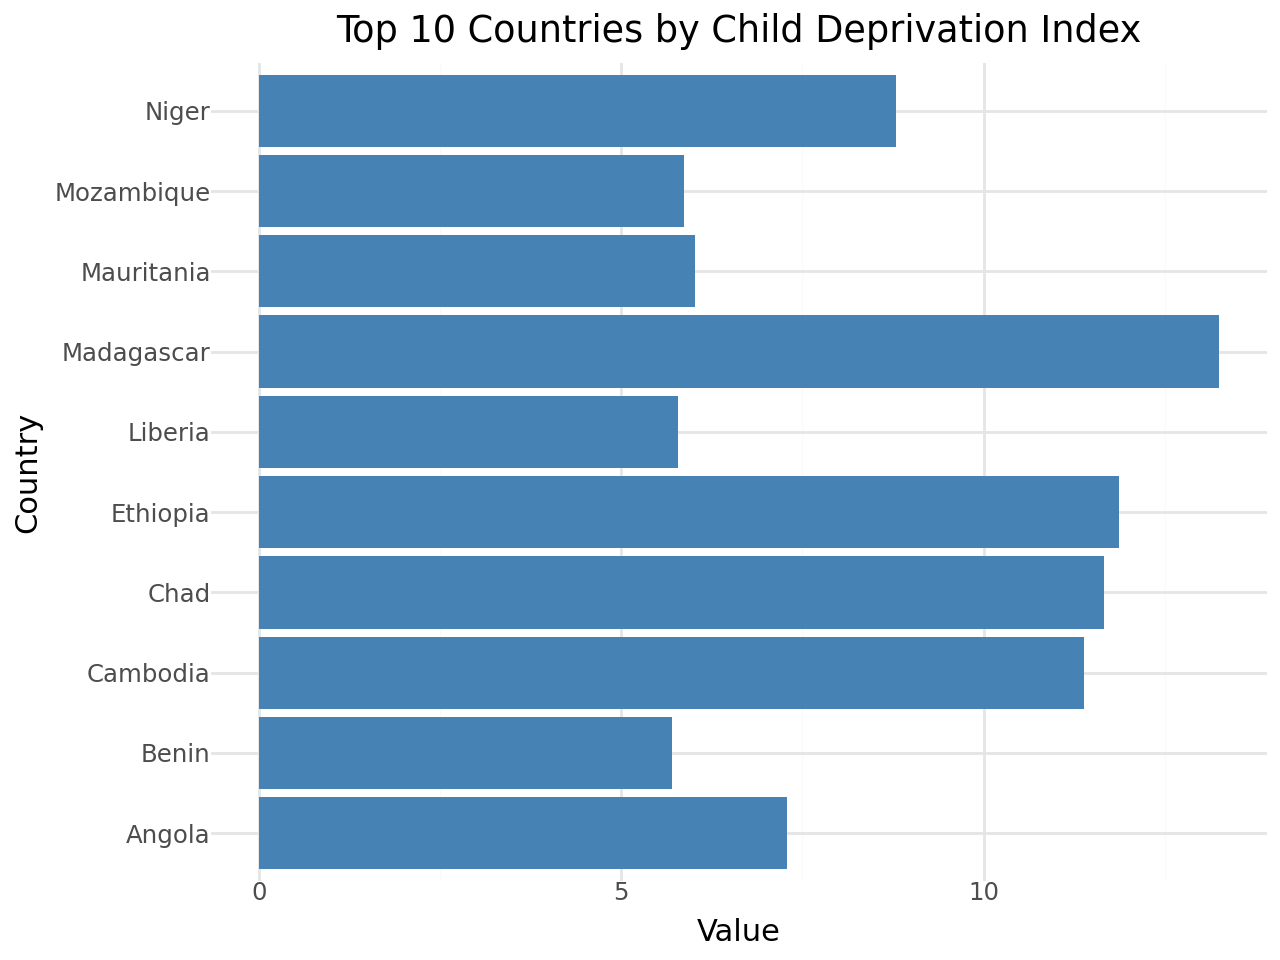

In [6]:
top_n = 10
top_countries = indicator_1.nlargest(top_n, 'Value')

bar_chart = (
    ggplot(top_countries, aes(x='Country', y='Value'))
    + geom_bar(stat='identity', fill='steelblue')
    + coord_flip()
    + theme_minimal()
    + labs(title=f'Top {top_n} Countries by Child Deprivation Index')
)

bar_chart # This will display the chart

###📊 The bar chart illustrates the top 10 countries by Child Deprivation Index. Madagascar has the highest deprivation, followed by Ethiopia, Chad, and Cambodia. Other countries on the list include Niger, Mozambique, Mauritania, Liberia, Benin, and Angola. Most of these countries are in Africa, highlighting significant regional disparities in child wellbeing.

/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


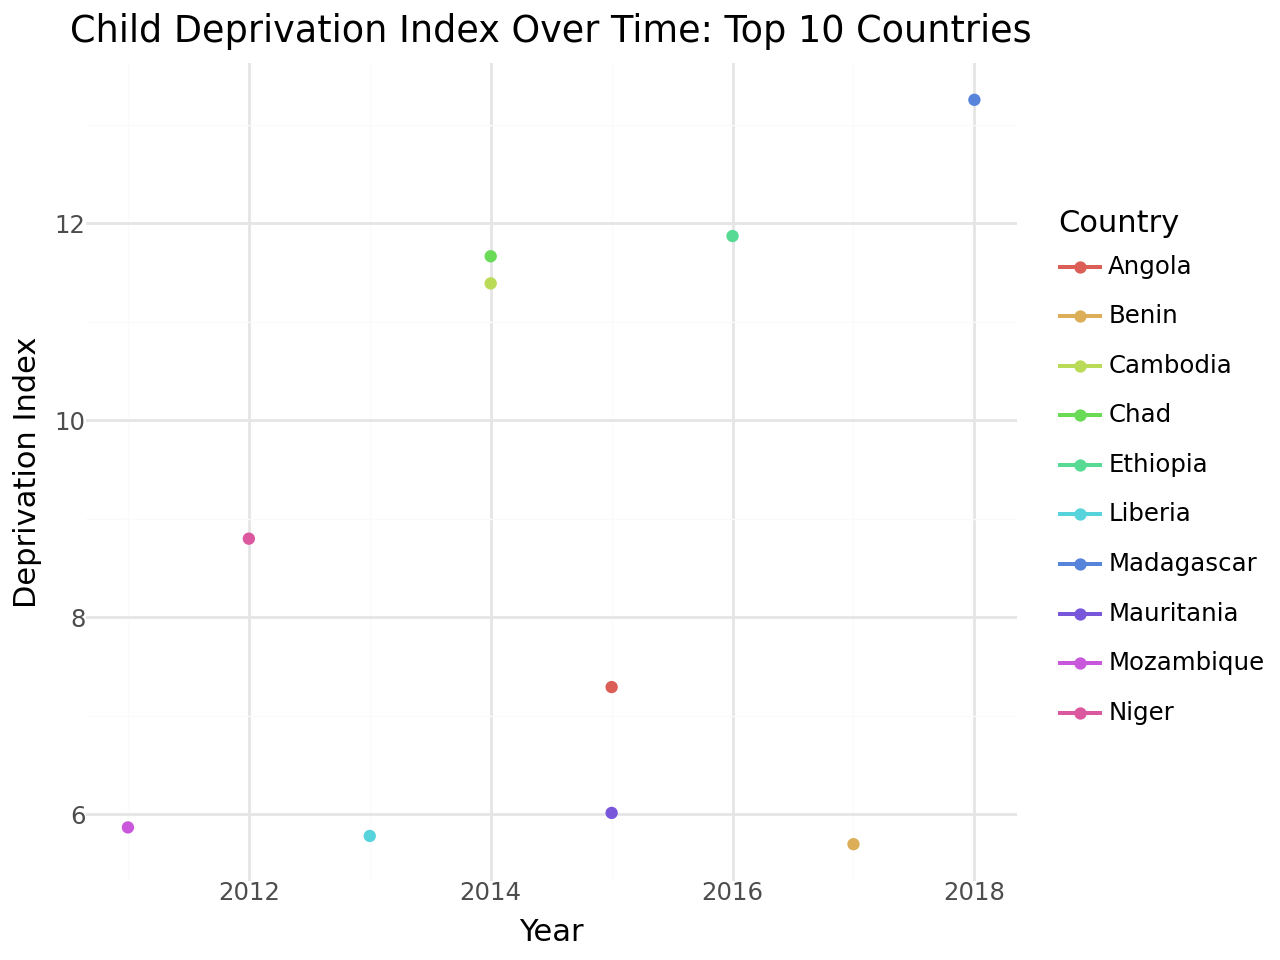

In [8]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, theme_minimal, labs

# Load your datasets
indicator_1 = pd.read_csv("unicef_indicator_1.csv")
metadata = pd.read_csv("unicef_metadata.csv")

# Clean indicator_1 data
indicator_1 = indicator_1[indicator_1['sex'] == 'Total']
indicator_1 = indicator_1.rename(columns={'country': 'Country', 'time_period': 'Year', 'obs_value': 'Value'})
indicator_1 = indicator_1[['Country', 'Year', 'Value']]

# Get top countries from indicator data based on average 'Value'
top_countries = indicator_1.groupby('Country')['Value'].mean().nlargest(10).index.tolist()

# Filter the indicator data for only the top countries
multi_country_data = indicator_1[indicator_1['Country'].isin(top_countries)]

# Create a time series chart for the top countries
multi_time_series_chart = (
    ggplot(multi_country_data, aes(x='Year', y='Value', color='Country'))
    + geom_line()
    + geom_point()
    + theme_minimal()
    + labs(
        title='Child Deprivation Index Over Time: Top 10 Countries',
        x='Year',
        y='Deprivation Index'
    )
)

multi_time_series_chart  # Display the chart

# 📉 Child Deprivation Index Over Time: Top 10 Countries
## This chart illustrates the Child Deprivation Index over time for the top 10 countries. The x-axis represents the year, ranging from 2012 to 2018, while the y-axis represents the Deprivation Index. Each line represents a different country: Angola, Benin, Cambodia, Chad, Ethiopia, Liberia, Madagascar, Mauritania, Mozambique, and Niger. The chart shows how the Deprivation Index has changed for each of these countries over the specified period.

In [22]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, labs # Import necessary functions from plotnine

# Load your datasets
indicator_1 = pd.read_csv("unicef_indicator_1.csv")
metadata = pd.read_csv("unicef_metadata.csv")

# Clean indicator_1 data
indicator_1 = indicator_1[indicator_1['sex'] == 'Total']
indicator_1 = indicator_1.rename(columns={'country': 'Country', 'time_period': 'Year', 'obs_value': 'Value'})
indicator_1 = indicator_1[['Country', 'Year', 'Value']]

scatter_plot = (
    ggplot(indicator_1, aes(x='Year', y='Value'))
    + geom_point()
    + geom_smooth(method='lm', color='red')
    + labs(title='Child Deprivation Over Time', x='Year', y='Deprivation Index')
    + theme_minimal()
)

print(scatter_plot)  # This will display the chart

<ggplot: (640 x 480)>


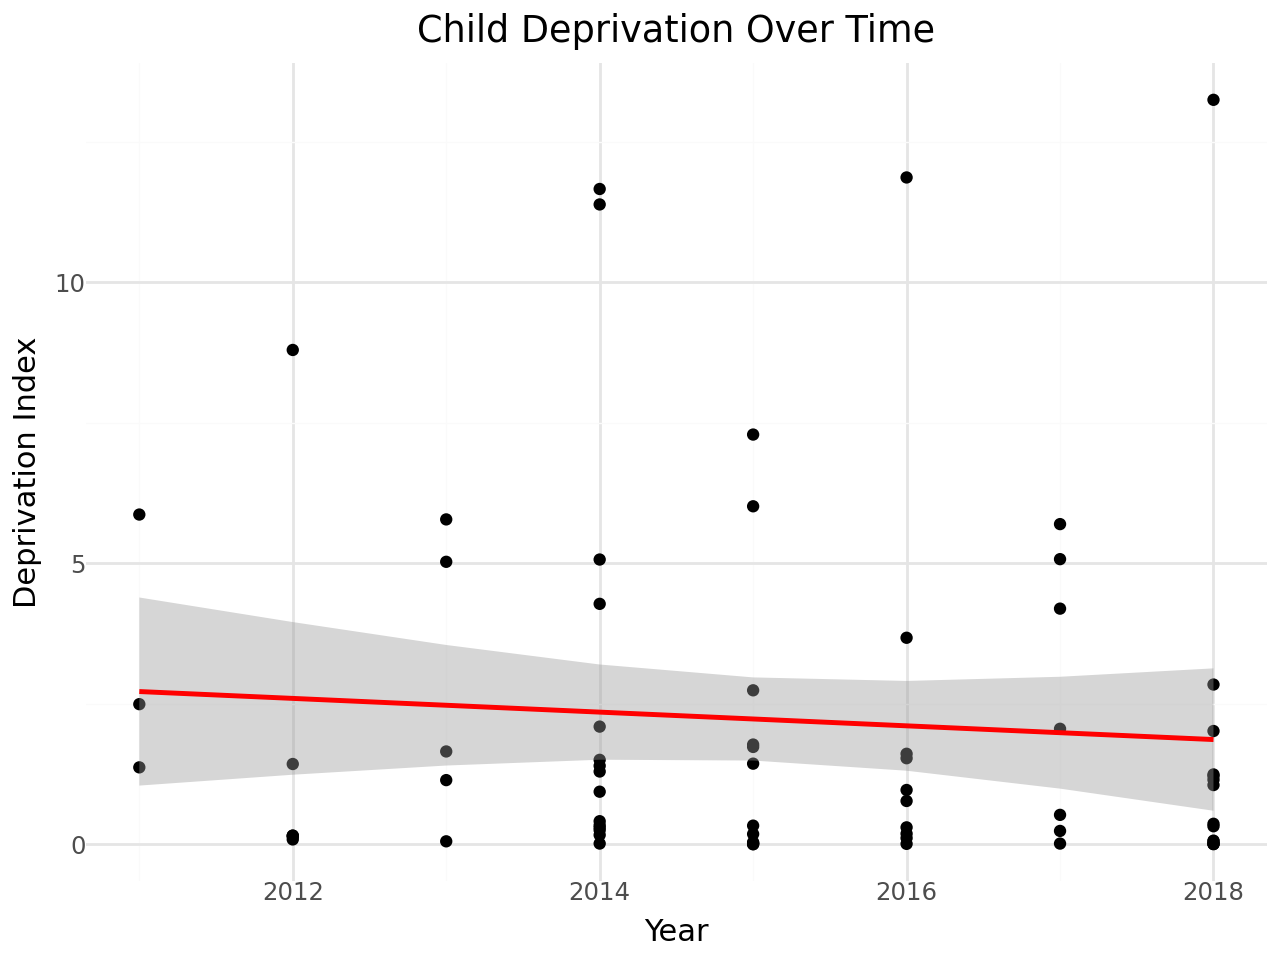

In [23]:
scatter_plot


## 📈 The scatter plot titled "Child Deprivation Over Time" illustrates the trend of the Deprivation Index from 2011 to 2018. Individual data points are scattered across the years, with a linear regression line indicating a slight downward trend in the deprivation index over time. The grey area around the regression line represents the confidence interval. While there's variability in deprivation levels each year, the overall trend suggests a marginal decrease in child deprivation during the observed period.

In [2]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_minimal


In [5]:
import pandas as pd

indicator_1 = pd.DataFrame({
    'Year': [2015, 2016, 2017, 2018, 2019],
    'Value': [0.3, 0.28, 0.25, 0.22, 0.20]
})


In [6]:
scatter_plot = (
    ggplot(indicator_1, aes(x='Year', y='Value'))
    + geom_point()
    + geom_smooth(method='lm', color='red')
    + labs(title='Child Deprivation Over Time', x='Year', y='Deprivation Index')
    + theme_minimal()
)

print(scatter_plot)  # This will display the chart

<ggplot: (640 x 480)>


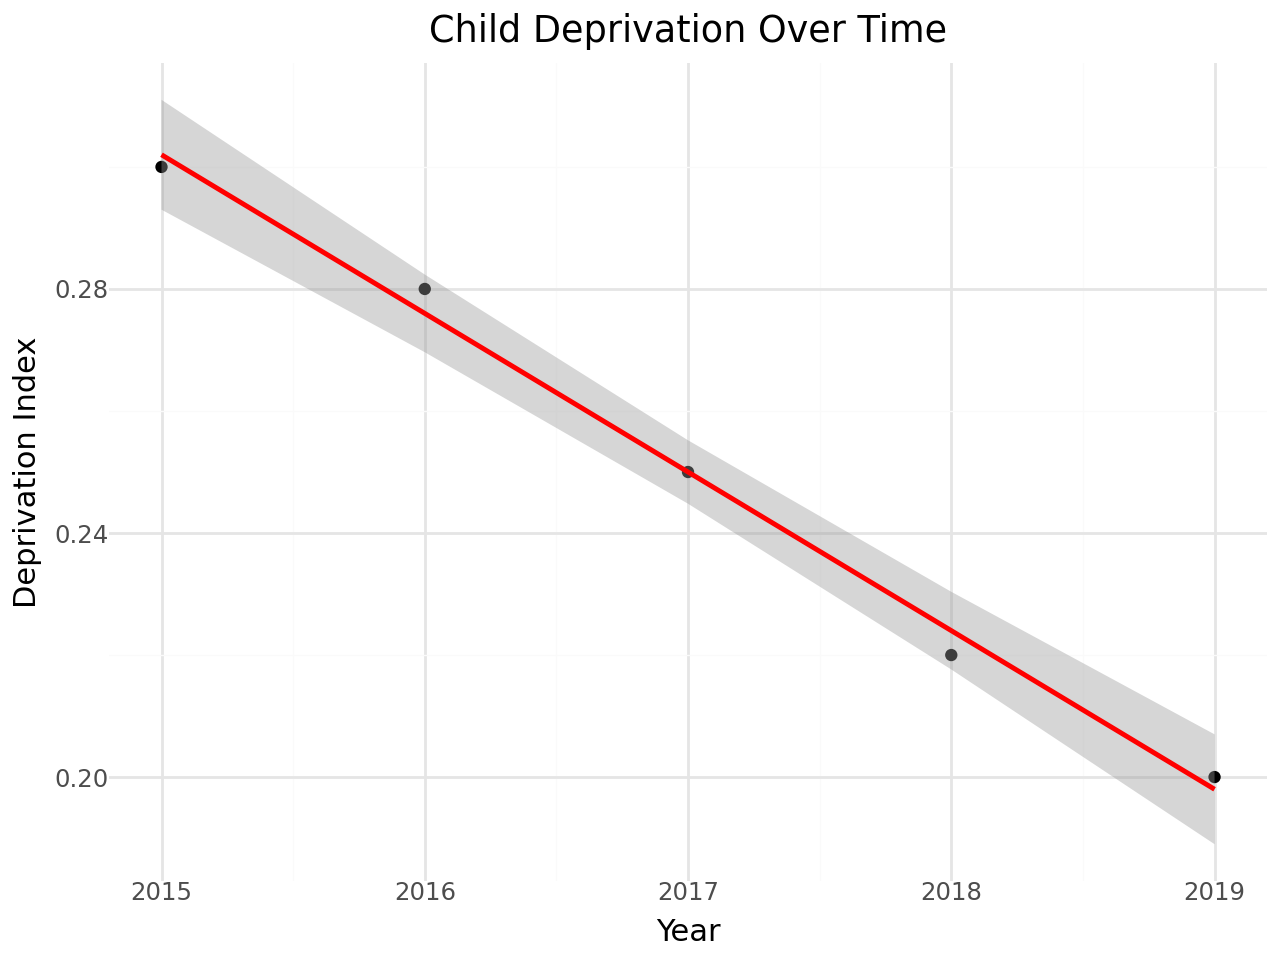

In [7]:
scatter_plot


## 📈 The graph titled "Child Deprivation Over Time" illustrates a clear downward trend in the deprivation index from 2015 to 2019. The deprivation index, plotted on the vertical axis, starts at approximately 0.29 in 2015 and steadily declines each year, reaching about 0.20 by 2019. The data points are connected by a red regression line, which highlights the consistent decrease over the observed period. Additionally, the shaded region around the regression line represents the confidence interval, indicating the range within which the true values are likely to fall. Overall, the chart demonstrates a significant reduction in child deprivation over these five years, suggesting improvements in the conditions measured by the deprivation index.

---
title: "UNICEF Child Deprivation Report"
format:
  html:
    embed-resources: true
    code-fold: true
    theme: cosmo
---

In [15]:
from google.colab import drive
drive.mount('/content/drive')
!pip install quarto
!quarto render "/content/drive/MyDrive/Colab Notebooks/Final.ipynb" --to html


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
pandoc 
  to: html
  output-file: Final.html
  standalone: true
  embed-resources: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: UNICEF Child Deprivation Report
  theme: cosmo
  
Output created: Final.html

